In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sunpy.map
from astropy.visualization import AsinhStretch, ImageNormalize
from sunpy.visualization.colormaps import cm

/home/zorinep/project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2025-07-24 00:00:04
Exposure Time,2.00007 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.60071403 0.60071403] arcsec / pix
Reference Pixel,[2042.01135 2045.81287] pix

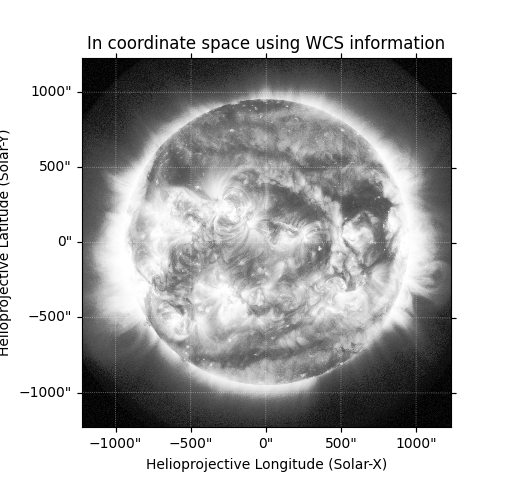
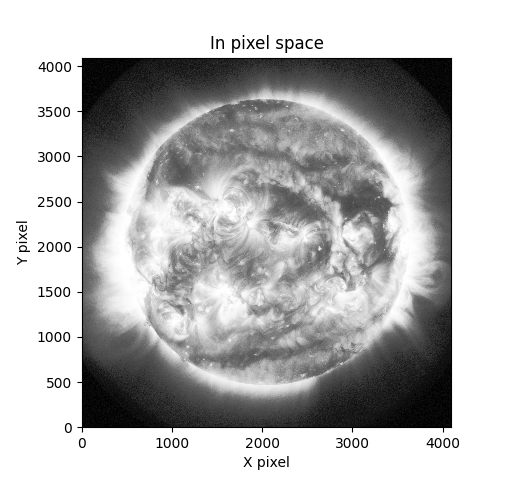
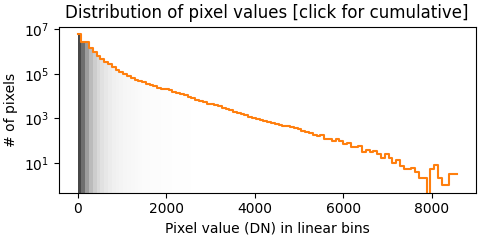
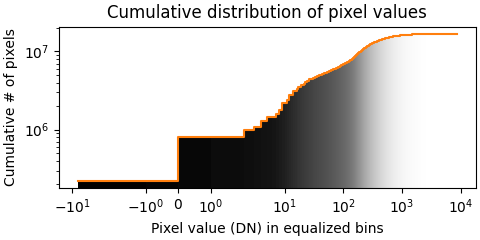

In [11]:
aia = sunpy.map.Map("../data/fits/aia.lev1_euv_12s.2025-07-24T000006Z.193.image_lev1.fits")
aia

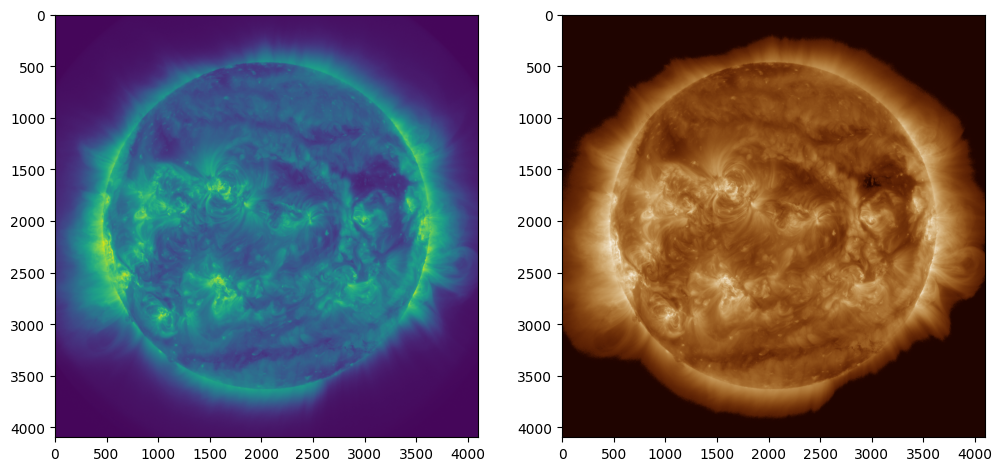

In [12]:
norm = ImageNormalize(stretch=AsinhStretch(0.01), clip=True)
percentile = 30

img = aia.data[::-1, :]
fit, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, norm=norm)
staled = np.where((img>np.percentile(img, percentile)), img, 0)
ax[1].imshow(staled, norm=norm, cmap=cm.sdoaia193)
plt.show()

In [13]:
norm = ImageNormalize(stretch=AsinhStretch(0.01), clip=True)
vmin, vmax = 50, 3000   


aia.plot(cmap=cm.sdoaia193, norm=norm, vmin=vmin, vmax=vmax, title=None)
plt.axis('off')
plt.savefig("result.jpg", bbox_inches='tight', pad_inches=0, dpi=150)
plt.close()

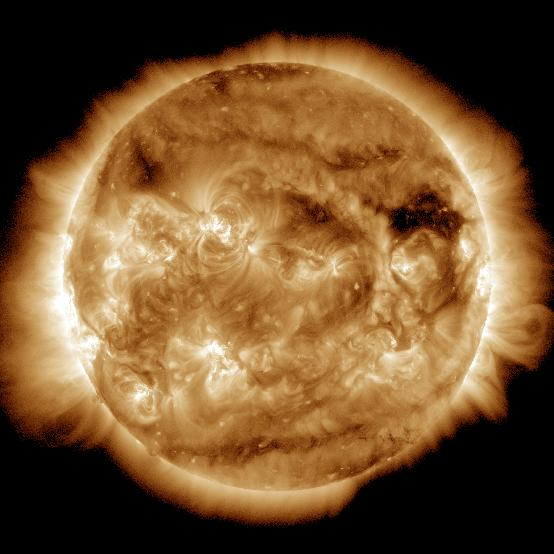

In [14]:
from PIL import Image

img = Image.open("./result.jpg")
img

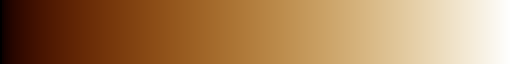

In [8]:
cm.sdoaia193

# .jp2

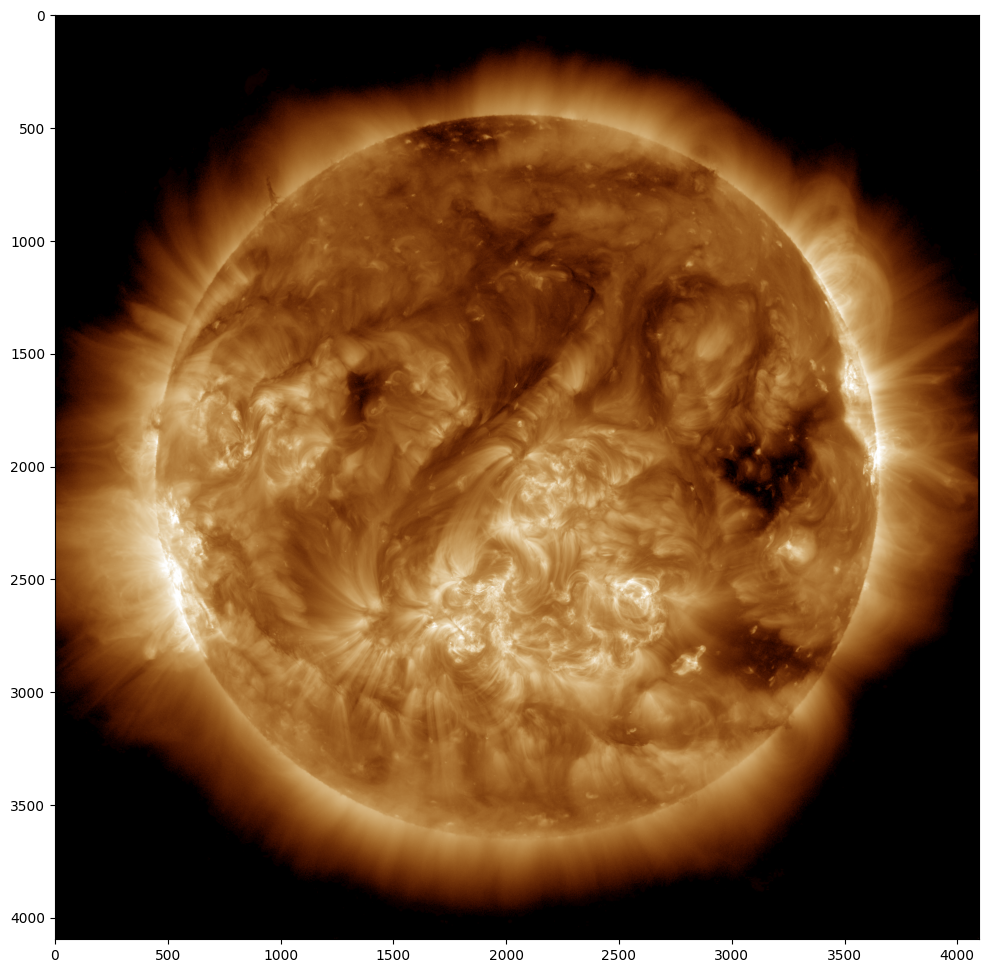

In [20]:
colormap = colormap = cm.sdoaia193

img = cv2.imread(filename="/home/zorinep/project/data/jp2/2025_09_27__00_00_04_843__SDO_AIA_AIA_193.jp2", flags=cv2.IMREAD_GRAYSCALE)
img_normalized = cv2.normalize(img.astype(np.float32), None, 0, 1, cv2.NORM_MINMAX)
colored_img = (colormap(img_normalized) * 255).astype(np.uint8)
cv2.imwrite("result.jpg", cv2.cvtColor(colored_img, cv2.COLOR_RGB2BGR))
plt.figure(figsize=(12, 12))
plt.imshow(colored_img[:, ::-1, :])
plt.show()